In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
df.shape

(100, 3)

**Steps**
0. Preproces + EDA + Feature selection
1. Extract input and output cols
2. Train text split
3. Scale the values
4. Train the model
5. Evalute the model/model selection 
6. Deploy the model

In [8]:
import matplotlib.pyplot as plt

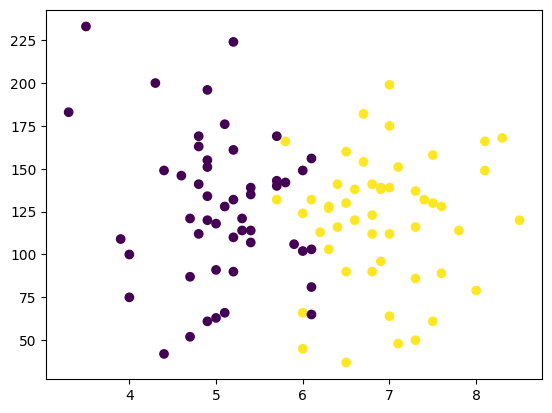

In [9]:
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

**Algroithm - Logistic Regression**
- It finds a line to seperate different data

In [10]:
# 1. Extract input and output cols
x = df.iloc[:,0:2]
y = df.iloc[:,2]

In [11]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
# 2. Train test split
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [15]:
x_train

,cgpa,iq
16,5.2,224.0
28,5.2,90.0
22,4.9,120.0
91,7.5,158.0
36,5.7,140.0
...,...,...
13,6.4,116.0
18,4.0,100.0
89,4.9,151.0
43,6.8,141.0


In [16]:
x_test

,cgpa,iq
79,6.5,90.0
65,8.1,166.0
58,8.0,79.0
1,5.9,106.0
11,6.9,138.0
40,4.9,134.0
53,8.3,168.0
38,6.5,160.0
42,7.6,89.0
82,6.5,37.0


In [17]:
y_train

16    0
28    0
22    0
91    1
36    0
     ..
13    1
18    0
89    0
43    1
7     0
Name: placement, Length: 90, dtype: int64

In [18]:
y_test

79    1
65    1
58    1
1     0
11    1
40    0
53    1
38    1
42    1
82    1
Name: placement, dtype: int64

In [19]:
# 3. Scaling the values
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
x_train = scaler.fit_transform(x_train)

In [22]:
x_train

array([[-0.62406011,  2.52335837],
       [-0.62406011, -0.8696288 ],
       [-0.89626727, -0.11000481],
       [ 1.46286143,  0.85218558],
       [-0.17038152,  0.39641119],
       [ 1.28138999, -1.88246079],
       [-0.17038152,  1.13071438],
       [ 0.82771139, -0.8696288 ],
       [ 1.46286143,  0.14320319],
       [ 1.28138999, -0.970912  ],
       [ 1.00918283,  1.28263918],
       [ 2.37021862, -0.11000481],
       [ 0.46476852,  0.42173199],
       [ 1.46286143, -1.60393199],
       [-0.71479583,  1.30795998],
       [-1.07773871, -1.83181919],
       [ 0.82771139, -0.31257121],
       [ 0.19256136, -0.5404584 ],
       [ 0.91844711,  0.37109039],
       [ 0.10182564,  0.62429838],
       [-0.0796458 ,  1.05475198],
       [ 0.19256136,  0.80154398],
       [ 0.3740328 ,  0.06724079],
       [ 0.91844711, -0.717704  ],
       [-0.44258867,  0.37109039],
       [-0.98700299,  0.97878958],
       [-0.0796458 ,  0.44705279],
       [-0.44258867, -0.26192961],
       [ 1.37212571,

In [23]:
x_test = scaler.transform(x_test)

In [24]:
x_test

array([[ 0.55550424, -0.8696288 ],
       [ 2.00727574,  1.05475198],
       [ 1.91654002, -1.1481576 ],
       [ 0.01108992, -0.464496  ],
       [ 0.91844711,  0.34576959],
       [-0.89626727,  0.24448639],
       [ 2.18874718,  1.10539358],
       [ 0.55550424,  0.90282718],
       [ 1.55359714, -0.8949496 ],
       [ 0.55550424, -2.21163119]])

In [25]:
# 4. Model Training
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
clf.fit(x_train,y_train)

LogisticRegression()

In [28]:
# 5. Evalute the model/model selection 
y_pre = clf.predict(x_test)

In [29]:
y_test

79    1
65    1
58    1
1     0
11    1
40    0
53    1
38    1
42    1
82    1
Name: placement, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pre)

1.0

In [32]:
from mlxtend.plotting import plot_decision_regions

TypeError: ignored

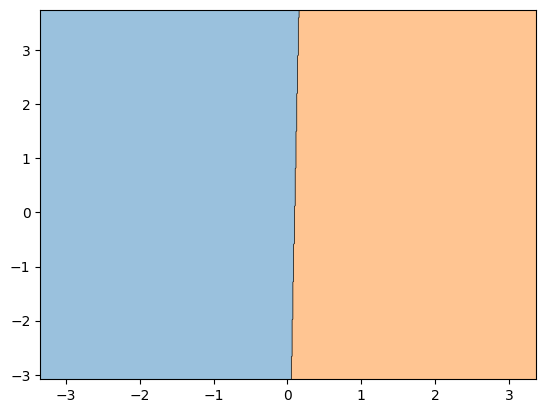

In [33]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [34]:
# 6. Deploy the model
import pickle

In [35]:
pickle.dump(clf,open("model.pkl","wb"))